<a href="https://colab.research.google.com/github/Senihayild/PRA3024/blob/main/GW_Assign2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Load the data of the LIGO Hanford detector from [2]. Plot the noise power spectral
density (PSD) of that data. Test whether there is any gravitational wave signal present
in the data or not? For this test, you can assume the GW signals can produce only
from equal mass binary systems with a range between 5 to 10. We assume a threshold
on matched filter SNR of 8 to claim detection of GW.

- Whiten the above data using its noise PSD. You can use PyCBC based function of the
Welch method to estimate the PSD. Construct a histogram of the whitened data and
show that the whiten data follows a Gaussian distribution with zero mean.

- In gravitational wave data analysis, we consider that the noise is stationary Gaussian.
But in reality, the stationary assumption does not hold. Can you think of a test to
show that the stationarity does not hold?

In [81]:
! pip install pycbc
import numpy as np
import pycbc
from pycbc.types import FrequencySeries, TimeSeries
import matplotlib.pyplot as plt
d = np.load('noise_ts_4096Hz.npy')
time = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = time[1]- time[0])
data = d
print(data)

[-5.16209393e-20 -6.56159222e-20 -8.82291920e-20 ...  7.25991474e-20
  6.00433087e-20  3.42870480e-20]


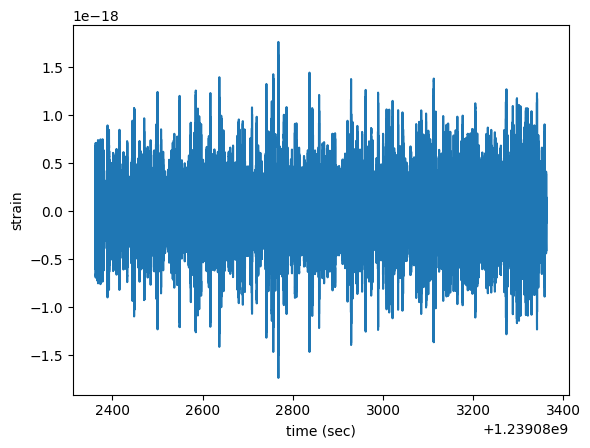

In [ ]:
plt.plot(time, data)
plt.xlabel('time (sec)')
plt.ylabel('strain')

#To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal


In [82]:
sampling_rate = data.sample_rate
duration = data.duration

print("Sampling Rate:", sampling_rate, "Hz")
print("Duration:", duration, "seconds")

Sampling Rate: 4096.0 Hz
Duration: 1000.0 seconds


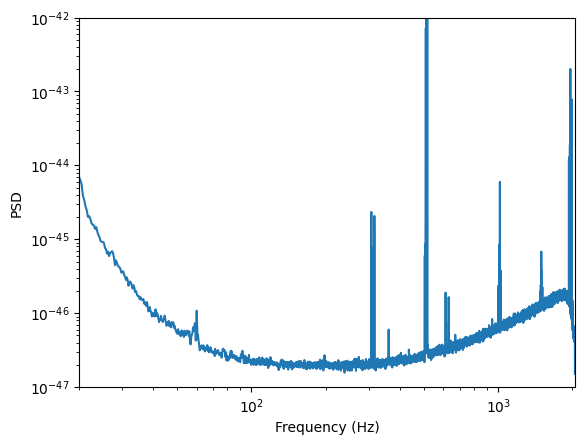

In [83]:
psd = data.psd(4)

# Plot the PSD on a log-log scale

plt.loglog(psd.sample_frequencies, psd)
plt.xlim(20, 2048)
plt.ylim(1e-47, 1e-42)


plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.show()

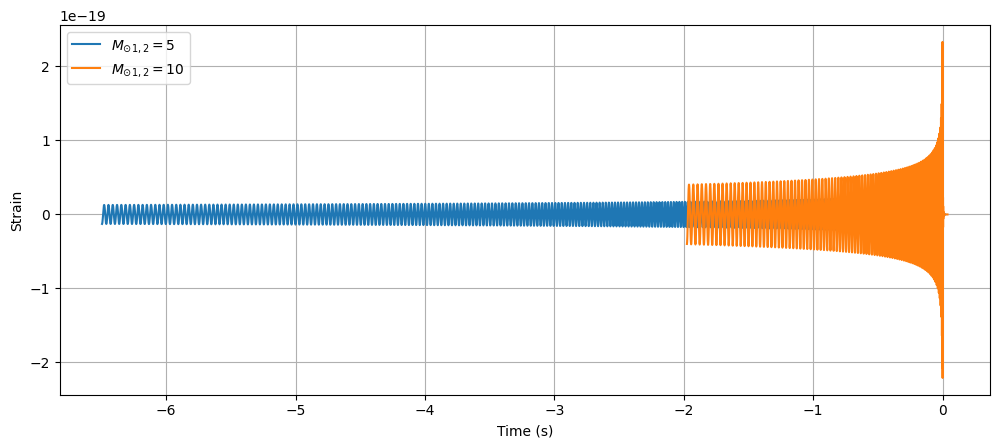

In [84]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab
pylab.figure(figsize=pylab.figaspect(0.4))
for m in [5, 10,]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                             delta_f=1.0/1000,
                         f_lower=30)

    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

In [90]:
conditioned = data.crop(2,2)
hp.resize(len(conditioned)) #generated waveform resized as same lenght as conditioned strain
template = hp.cyclic_time_shift(hp.start_time)

from pycbc.psd import interpolate, inverse_spectrum_truncation
psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

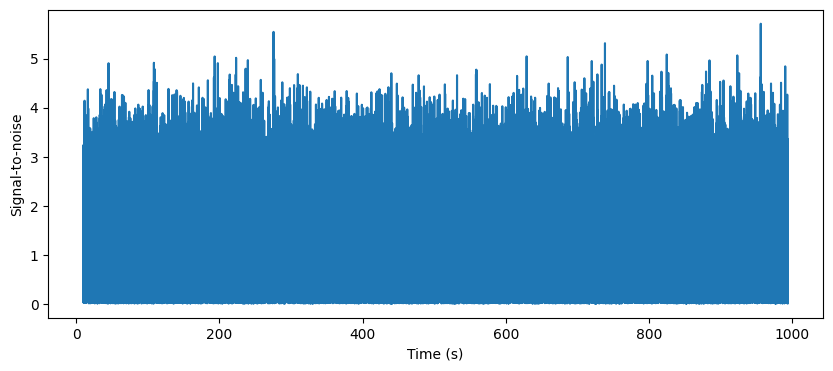

We found a signal at 956.0270996090002s with SNR 5.7138425334810705


In [87]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seonds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for
# so short a template). A longer signal such as from a BNS, would
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# taking an abs() to maximise over the phase of the signal
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]
print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))

SNR do not cross 8, means there is only noise.

In [88]:
import pycbc.psd
white_data = (data.to_frequencyseries() / psd**0.5).to_timeseries()

ValueError: different delta_f

In [80]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
